In [23]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


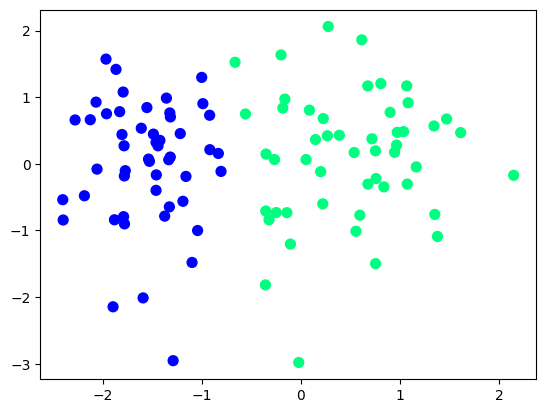

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [26]:
print(lor.coef_)
print(lor.intercept_)


[[13.46402374  0.98770535]]
[8.9253748]


In [27]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
m2 = -lor.intercept_/lor.coef_[0][1]
print(m1,m2)

-13.631619690186948 [-9.03647507]


In [28]:
x_input = np.linspace(-5, 5, 100)
y_input = m1 * x_input + m2


In [36]:

def gd(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    for i in range(1000*8):
        y_pred = sigmoid(np.dot(x, weights))
        weights = weights - 0.03 * (np.dot(y - y_pred, x) / x.shape[0])
    
    return weights[1:], weights[0]

In [30]:
coeff, intercept = gd(X, y)

m = -(coeff[0]/coeff[1])
b = -intercept/coeff[1]
print(m,b)

8.08830520892954 -2.849037069989553


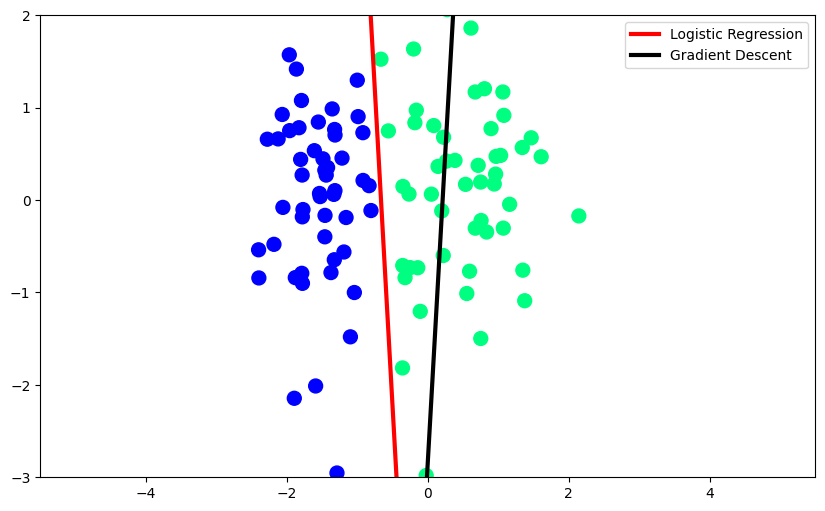

In [37]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label='Logistic Regression')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Gradient Descent')

plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

plt.legend()
plt.show()